In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix
%matplotlib inline

In [2]:
#load data file
data = pd.read_excel(r"C:\Users\Lt col Haider\OneDrive\IBA\semester 4\Foundations to Data Science\project\default of credit card clients.xls")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
data.shape

(30000, 25)

# Data Cleaning

In [4]:
#ID is unique variable so drop it
data =  data.drop(columns = ['ID'])

In [5]:
#rename target column for ease 
data = data.rename(columns={'default payment next month': 'Default'})

In [6]:
#categorical variables have already been dummified

In [7]:
#check for missing values 
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Default,PAY_AMT6,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,LIMIT_BAL
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing data found.

# Exploratory Data Analysis

In [8]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


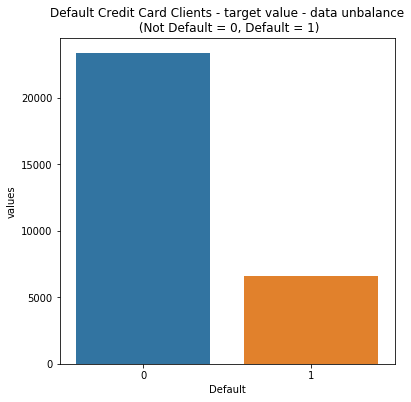

In [9]:
temp = data["Default"].value_counts()
df = pd.DataFrame({'Default': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Not Default = 0, Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'Default', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

data is imbalanced

In [10]:
numerical = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3',
             'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
categorical = ['SEX','EDUCATION','MARRIAGE']

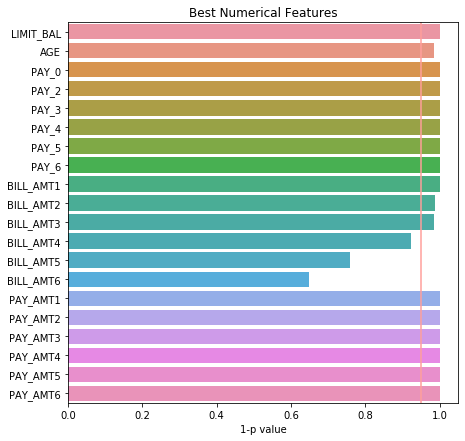

In [11]:
#T Test for numerical columns
p=[]
from scipy.stats import ttest_ind

for i in numerical:
    df1=data.groupby('Default').get_group(0)
    df2=data.groupby('Default').get_group(1)
    t,pvalue=ttest_ind(df1[i],df2[i])
    p.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=p, y=numerical)
plt.title('Best Numerical Features')
plt.axvline(x=(1-0.05),color='r')
plt.xlabel('1-p value')
plt.show()

All features show importance, and almost all of them show statistical significance so won't drop any.

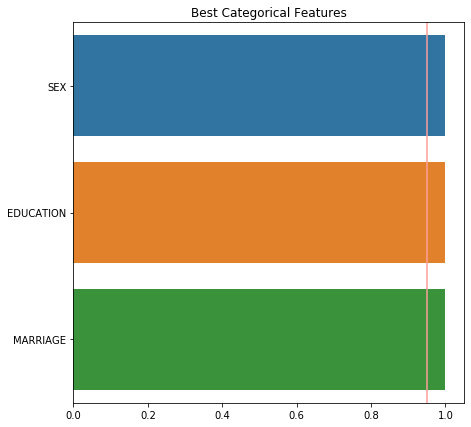

In [12]:
#Chi Square test for Categorical Columns
from scipy.stats import chi2_contingency
l=[]
for i in categorical:
    pvalue  = chi2_contingency(pd.crosstab(data['Default'],data[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=categorical)
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

All categorical features show statistical significance so won't drop any.

In [13]:
#drop target variable: 'Default'
features =  data.drop(columns = ['Default'])

In [14]:
#correlation analysis
corr_matrix = features.corr().abs()
corr_matrix

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,0.219161,0.108139,0.144713,0.271214,0.296382,0.286123,0.267460,0.249411,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,0.031389,0.090874,0.057643,0.070771,0.066096,0.060173,0.055064,...,0.024563,0.021880,0.017005,0.016733,0.000242,0.001391,0.008597,0.002229,0.001667,0.002766
EDUCATION,0.219161,0.014232,1.000000,0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,0.013002,0.000451,0.007567,0.009099,0.037456,0.030038,0.039943,0.038218,0.040358,0.037200
MARRIAGE,0.108139,0.031389,0.143464,1.000000,0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,0.024909,0.023344,0.025393,0.021207,0.005979,0.008093,0.003541,0.012659,0.001205,0.006641
AGE,0.144713,0.090874,0.175061,0.414170,1.000000,0.039447,0.050148,0.053048,0.049722,0.053826,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_0,0.271214,0.057643,0.105364,0.019917,0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179785,0.179125,0.180635,0.176980,0.079269,0.070101,0.070561,0.064005,0.058190,0.058673
PAY_2,0.296382,0.070771,0.121566,0.024199,0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.224146,0.222237,0.221348,0.219403,0.080701,0.058990,0.055901,0.046858,0.037093,0.036500
PAY_3,0.286123,0.066096,0.114025,0.032688,0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227494,0.227202,0.225145,0.222327,0.001295,0.066793,0.053311,0.046067,0.035863,0.035861
PAY_4,0.267460,0.060173,0.108793,0.033122,0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.244983,0.245917,0.242902,0.239154,0.009362,0.001944,0.069235,0.043461,0.033590,0.026565
PAY_5,0.249411,0.055064,0.097520,0.035629,0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.243335,0.271915,0.269783,0.262509,0.006089,0.003191,0.009062,0.058299,0.033337,0.023027


In [15]:
#Feature Selection 

#Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [16]:
#Drop highly correlated attributes
data = data.drop(data[to_drop], axis=1)

In [17]:
data.shape

(30000, 23)

In [18]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

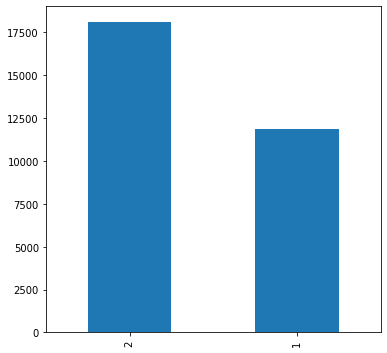

In [19]:
plt.figure(figsize=(6,6))
data.SEX.value_counts().plot(kind = 'bar')

In [20]:
pd.crosstab(data.SEX, data.Default)

Default,0,1
SEX,,
1,9015,2873
2,14349,3763


Female population is in majority and is more likely to default on the loan. This could be explained by their high percentage in the dataset.

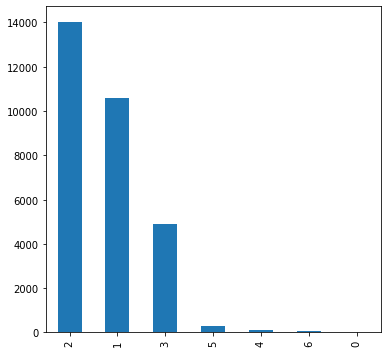

In [21]:
plt.figure(figsize=(6,6))
data.EDUCATION.value_counts().plot(kind = 'bar')

In [22]:
pd.crosstab(data.EDUCATION, data.Default)

Default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


University education level in highest in the dataset, and is most likely to default. This could be explained by their high percentage in the dataset. Next are Graduates, and then Highschools. This should be the opposite, but again could be explained by the difference in their numbers in the dataset. Though, those least likely to default are unknown labels [0,4,5,6]. Logically speaking, they need to be above graduate level atleast as education level and likeliness of default has an inverse relationship. I tried removing these unknowns but they reduced the accuracy and AUC score. Thus, I believe that they carry important information. So I won't remove them.  

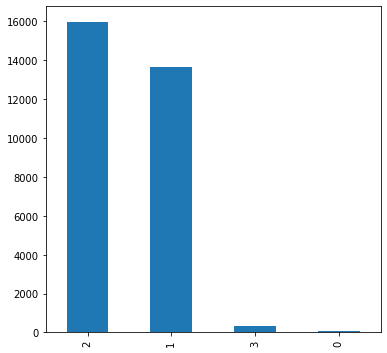

In [23]:
plt.figure(figsize=(6,6))
data.MARRIAGE.value_counts().plot(kind = 'bar')

In [24]:
pd.crosstab(data.MARRIAGE, data.Default)

Default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


Single people are highest in number and are most likely to default. This makes sense. Type '3' may be people in a relationship. The '0' column is unknown. I tried removing them but this reduce model accuracy. Thus i infer that they carry important information and won't remove them.

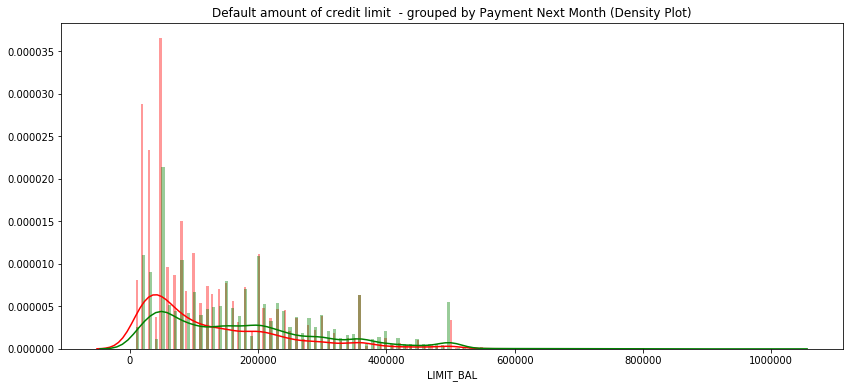

In [25]:
#density plot for amount of credit limit (LIMIT_BAL) grouped by default payment next month.
class_0 = data.loc[data['Default'] == 0]["LIMIT_BAL"]
class_1 = data.loc[data['Default'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

This shows that higher the credit limit, lower is the chance of default. This is sensible as richer people tend to have higher credit limit and are so less likely to default on loans. The highest defaulters are for credit limit 0 to 100,000, with the highest being for credit limit 50,000, and the density for this interval is larger for defaulters than for non-defaulters.

In [26]:
def corr_2_cols(Col1, Col2):
    per = data.groupby([Col1, Col2]).size().unstack()
    per['perc'] = (per[per.columns[1]]/(per[per.columns[0]] + per[per.columns[1]]))
    return per

corr_2_cols('PAY_0', 'Default')

Default,0,1,perc
PAY_0,,,
-2,2394,365,0.132294
-1,4732,954,0.167781
0,12849,1888,0.128113
1,2436,1252,0.339479
2,823,1844,0.691414
3,78,244,0.757764
4,24,52,0.684211
5,13,13,0.500000
6,5,6,0.545455


No '-2' value qouted in data description. I am not able to infer it on inspection of the dataset too. Will keep it as I am not able to find an explanation.

# Pre-Processing

In [27]:
#Split test and train data
x = data.drop(columns = 'Default')
y = data['Default']

#will train on 70% of the data, test on the remaining 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=50)

In [28]:
#feature scaling
#To avoid data Leakage, scale the x_train and x_test separately
scaler = RobustScaler(copy=True)
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns = x.columns)

x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns = x.columns)

In [29]:
#balancing the dataset
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default, dtype: float64

Majority class (not default) has 77% samples. Minority class (default) has 22% samples.
Data is highly imbalanced. Thus, will apply SMOTE and Undersampling techniques.

In [30]:
from imblearn.over_sampling import SMOTE
#so as not to lose any important information, apply SMOTE (Synthetic Minority Oversampling Technique) to fix class imbalance
sm = SMOTE(random_state=10)
x_smote, y_smote = sm.fit_sample(x_train, y_train)

In [31]:
#Undersampling data

In [32]:
#create the training df by remerging x_train and y_train
df_train = x_train.join(y_train)
df_train.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
16405,0.473684,-1.0,0.0,-1.0,0.615385,0.0,0.0,0.0,0.0,0.0,...,0.272480,0.420493,0.531837,-0.164547,-0.120476,0.994893,1.208054,0.904101,0.014384,1.0
6101,0.105263,0.0,1.0,-1.0,1.692308,-1.0,-1.0,-1.0,-1.0,0.0,...,-0.334495,-0.354917,-0.358133,0.613812,-0.477619,0.174703,-0.402685,-0.387472,-0.385282,NaN
7731,0.684211,-1.0,-1.0,-1.0,0.615385,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.268863,-0.218991,0.147701,0.454500,1.555000,0.770665,1.612617,5.855990,0.601040,NaN
14417,0.842105,0.0,-1.0,0.0,-0.461538,0.0,0.0,0.0,-1.0,-1.0,...,-0.231979,-0.180790,-0.280762,-0.070307,1.240714,1.237886,2.116242,0.571908,1.296089,NaN
19220,-0.631579,0.0,0.0,0.0,-0.923077,0.0,0.0,0.0,0.0,-2.0,...,-0.365483,-0.374090,0.043499,-0.242084,-0.239048,-0.430285,-0.402685,4.569842,-0.385282,1.0
7338,-0.578947,0.0,-1.0,0.0,-0.538462,2.0,0.0,0.0,0.0,0.0,...,0.148452,0.179777,0.219463,-0.174520,-0.072857,0.021021,-0.253154,-0.129157,0.128427,NaN
16399,0.315789,-1.0,0.0,0.0,-0.384615,-2.0,-2.0,-2.0,-2.0,-2.0,...,-0.062742,-0.246924,-0.149793,3.042633,6.523333,3.328622,1.249664,2.184049,4.693508,0.0
5429,0.421053,-1.0,-1.0,0.0,-0.461538,2.0,0.0,0.0,2.0,2.0,...,1.872296,2.022964,2.027698,1.963351,4.106667,-0.430285,1.879195,-0.387472,1.669556,NaN
15603,-0.473684,-1.0,1.0,0.0,0.000000,1.0,2.0,2.0,2.0,2.0,...,0.329518,0.388655,0.399278,-0.049863,-0.477619,0.329810,0.000000,-0.387472,0.385282,NaN
20911,-0.631579,0.0,0.0,0.0,-0.923077,0.0,0.0,0.0,0.0,0.0,...,-0.014815,0.032509,0.024685,-0.099726,-0.168095,-0.264014,0.038389,-0.387472,-0.128427,NaN


In [33]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df_train[df_train.Default==0]
df_minority = df_train[df_train.Default==1]

print(df_majority.Default.count())
print("-----------")
print(df_minority.Default.count())
print("-----------")
print(df_train.Default.value_counts())

11305
-----------
3402
-----------
0.0    11305
1.0     3402
Name: Default, dtype: int64


In [34]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=3402,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.Default.value_counts()

1.0    3402
0.0    3402
Name: Default, dtype: int64

In [35]:
#Downsampled data
y_downsampled = df_downsampled.Default
x_downsampled = df_downsampled.drop(['Default'], axis = 1)

# Modeling

# 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 1, 10]}

lr = LogisticRegression(penalty='l2', class_weight='balanced')
lr = GridSearchCV(estimator = lr, param_grid = param_grid, n_jobs = -1)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4966 2108]
 [ 671 1255]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7074
           1       0.37      0.65      0.47      1926

    accuracy                           0.69      9000
   macro avg       0.63      0.68      0.63      9000
weighted avg       0.77      0.69      0.72      9000



Text(0.5, 0, 'False Positive Rate')

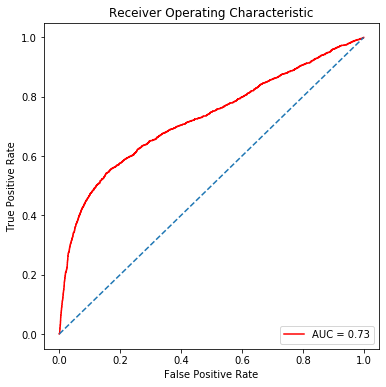

In [37]:
from sklearn.metrics import roc_curve, auc
y_prob = lr.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [38]:
lr.fit(x_smote, y_smote)
y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4839 2235]
 [ 663 1263]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      7074
           1       0.36      0.66      0.47      1926

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.77      0.68      0.70      9000



In [39]:
lr.fit(x_downsampled, y_downsampled)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3423 3651]
 [ 626 1300]]
              precision    recall  f1-score   support

           0       0.85      0.48      0.62      7074
           1       0.26      0.67      0.38      1926

    accuracy                           0.52      9000
   macro avg       0.55      0.58      0.50      9000
weighted avg       0.72      0.52      0.56      9000



Best result on original data = 0.69, AUC = 0.73

# 2. Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
dt2.fit(x_train, y_train)
dt2_score_train = dt2.score(x_train, y_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(x_test, y_test)
print("Testing score: ",dt2_score_test)

Training score:  0.8170952380952381
Testing score:  0.8254444444444444


In [41]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
dt3.fit(x_train, y_train)
dt3_score_train = dt3.score(x_train, y_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(x_test, y_test)
print("Testing score: ",dt3_score_test)

Training score:  0.8199047619047619
Testing score:  0.8257777777777778


In [42]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=42, max_depth=4)
dt4.fit(x_train, y_train)
dt4_score_train = dt4.score(x_train, y_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(x_test, y_test)
print("Testing score: ",dt4_score_test)

Training score:  0.8209047619047619
Testing score:  0.8263333333333334


In [43]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train, y_train)
dt1_score_train = dt1.score(x_train, y_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(x_test, y_test)
print("Testing score: ", dt1_score_test)

Training score:  0.9994285714285714
Testing score:  0.7181111111111111


In [44]:
#Compare Training and Testing scores for various tree depths used
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.8170952380952381   0.8254444444444444
3        0.8199047619047619   0.8257777777777778
4        0.8209047619047619   0.8263333333333334
max      0.9994285714285714   0.7181111111111111


Highest testing accuracy reached at depth 4. At this depth, training accuracy is good too so will go with this.

In [45]:
y_pred = dt4.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6731  343]
 [1220  706]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7074
           1       0.67      0.37      0.47      1926

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



Text(0.5, 0, 'False Positive Rate')

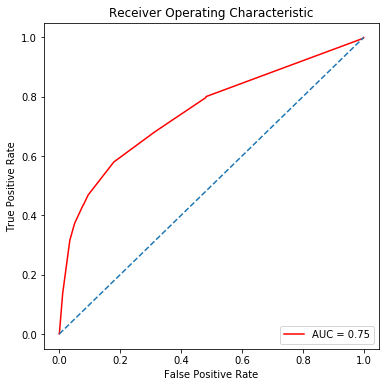

In [46]:
y_prob = dt4.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [47]:
dt4.fit(x_smote, y_smote)
dt4_score_train = dt4.score(x_smote, y_smote)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(x_test, y_test)
print("Testing score: ",dt4_score_test)

y_pred = dt4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score:  0.7147329650092081
Testing score:  0.7863333333333333
[[6043 1031]
 [ 892 1034]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7074
           1       0.50      0.54      0.52      1926

    accuracy                           0.79      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.79      0.79      9000



In [48]:
dt4.fit(x_downsampled, y_downsampled)
dt4_score_train = dt4.score(x_downsampled, y_downsampled)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(x_test, y_test)
print("Testing score: ",dt4_score_test)

y_pred = dt4.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score:  0.5177836566725456
Testing score:  0.23133333333333334
[[ 201 6873]
 [  45 1881]]
              precision    recall  f1-score   support

           0       0.82      0.03      0.05      7074
           1       0.21      0.98      0.35      1926

    accuracy                           0.23      9000
   macro avg       0.52      0.50      0.20      9000
weighted avg       0.69      0.23      0.12      9000



Best result on original data = 0.83, AUC = 0.75

# 3. Random Forest Classifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=100)

In [50]:
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6720  354]
 [1206  720]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7074
           1       0.67      0.37      0.48      1926

    accuracy                           0.83      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



Text(0.5, 0, 'False Positive Rate')

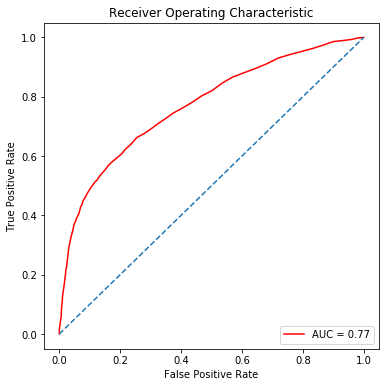

In [51]:
y_prob = rf.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [52]:
rf.fit(x_smote, y_smote)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6304  770]
 [ 989  937]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7074
           1       0.55      0.49      0.52      1926

    accuracy                           0.80      9000
   macro avg       0.71      0.69      0.70      9000
weighted avg       0.80      0.80      0.80      9000



In [54]:
rf.fit(x_downsampled, y_downsampled)
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3481 3593]
 [ 867 1059]]
              precision    recall  f1-score   support

           0       0.80      0.49      0.61      7074
           1       0.23      0.55      0.32      1926

    accuracy                           0.50      9000
   macro avg       0.51      0.52      0.47      9000
weighted avg       0.68      0.50      0.55      9000



Best result on original data = 0.83, AUC = 0.77

# 4. Support Vector Machine (SVM)

In [55]:
from sklearn import svm
from sklearn import metrics

In [56]:
#Radial Basis Function Kernel with low gamma 0.01

clf = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1) 

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.8246666666666667
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7074
           1       0.70      0.32      0.44      1926

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.81      0.82      0.80      9000



Text(0.5, 0, 'False Positive Rate')

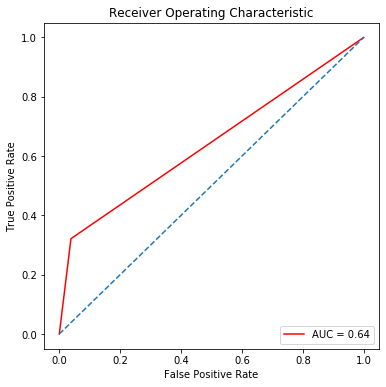

In [57]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [58]:
clf = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1) 

#Train the model using the training sets
clf.fit(x_smote, y_smote)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# model accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7883333333333333
[[5982 1092]
 [ 813 1113]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7074
           1       0.50      0.58      0.54      1926

    accuracy                           0.79      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.80      0.79      0.79      9000



In [59]:
clf = svm.SVC(kernel='rbf', random_state=0, gamma=.01, C=1) 

#Train the model using the training sets
clf.fit(x_downsampled, y_downsampled)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# model accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5201111111111111
[[3466 3608]
 [ 711 1215]]
              precision    recall  f1-score   support

           0       0.83      0.49      0.62      7074
           1       0.25      0.63      0.36      1926

    accuracy                           0.52      9000
   macro avg       0.54      0.56      0.49      9000
weighted avg       0.71      0.52      0.56      9000



Best result on original data = 0.82, AUC = 0.64

# 5. Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_train, y_train)
    
# Make predictions and evalute
y_pred = naive.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

Accuracy: 0.5765555555555556
[[3710 3364]
 [ 447 1479]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.66      7074
           1       0.31      0.77      0.44      1926

    accuracy                           0.58      9000
   macro avg       0.60      0.65      0.55      9000
weighted avg       0.77      0.58      0.61      9000



Text(0.5, 0, 'False Positive Rate')

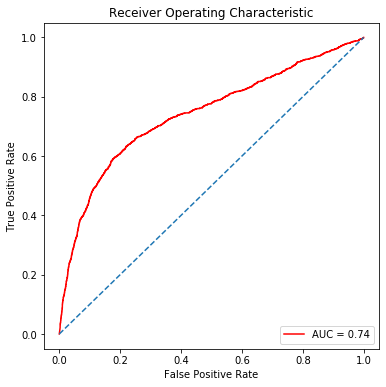

In [61]:
y_prob = naive.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [62]:
naive.fit(x_smote, y_smote)
    
# Make predictions and evalute
y_pred = naive.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))    
print(classification_report(y_test, y_pred))

Accuracy: 0.39444444444444443
[[1846 5228]
 [ 222 1704]]
              precision    recall  f1-score   support

           0       0.89      0.26      0.40      7074
           1       0.25      0.88      0.38      1926

    accuracy                           0.39      9000
   macro avg       0.57      0.57      0.39      9000
weighted avg       0.75      0.39      0.40      9000



In [63]:
naive.fit(x_downsampled, y_downsampled)
y_pred = naive.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1089 5985]
 [ 189 1737]]
              precision    recall  f1-score   support

           0       0.85      0.15      0.26      7074
           1       0.22      0.90      0.36      1926

    accuracy                           0.31      9000
   macro avg       0.54      0.53      0.31      9000
weighted avg       0.72      0.31      0.28      9000



Best result on original data = 0.58, AUC = 0.74

# 6. XGBoost Classifier

In [64]:
from xgboost import XGBClassifier

model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=5)

In [65]:
model.fit(x_train, y_train)
    
# Make predictions and evalute
y_pred = model.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.8281111111111111
[[6758  316]
 [1231  695]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7074
           1       0.69      0.36      0.47      1926

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.69      9000
weighted avg       0.81      0.83      0.81      9000



Text(0.5, 0, 'False Positive Rate')

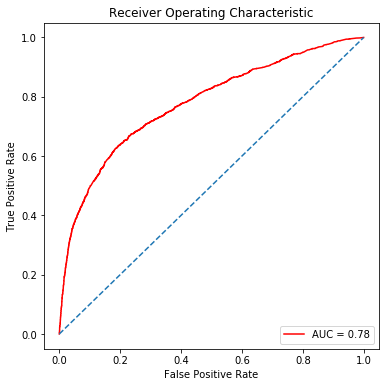

In [66]:
y_prob = model.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [67]:
model.fit(x_smote, y_smote)
    
# Make predictions and evalute
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Accuracy: 0.7912222222222223
[[6049 1025]
 [ 854 1072]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7074
           1       0.51      0.56      0.53      1926

    accuracy                           0.79      9000
   macro avg       0.69      0.71      0.70      9000
weighted avg       0.80      0.79      0.79      9000



In [68]:
model.fit(x_downsampled, y_downsampled)
y_pred = model.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2947 4127]
 [ 631 1295]]
              precision    recall  f1-score   support

           0       0.82      0.42      0.55      7074
           1       0.24      0.67      0.35      1926

    accuracy                           0.47      9000
   macro avg       0.53      0.54      0.45      9000
weighted avg       0.70      0.47      0.51      9000



Best result on original data = 0.83, AUC = 0.78

Best Accuracy = 0.83, DT, RF, XGB |  Best AUC = 0.78 XGB | Best Model = XGBoost Classifier